<a href="https://colab.research.google.com/github/Siuuuuuu0/ML-DL/blob/main/Sp500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install --no-deps pandas-ta

In [1]:
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime as dt
import yfinance as yf
import pandas_ta
import requests

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
headers = {"User-Agent": "Mozilla/5.0"}

html = requests.get(url, headers=headers, timeout=20).text
sp500 = pd.read_html(html)[0]
sp500.head()

/tmp/ipython-input-1891981873.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sp500 = pd.read_html(html)[0]


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [2]:
sp500["Symbol"]= sp500["Symbol"].str.replace(".", "-")
s_l = sp500["Symbol"].unique().tolist()
s_l

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APP',
 'APTV',
 'ACGL',
 'ADM',
 'ARES',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'XYZ',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CARR',
 'CVNA',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CIEN',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'FIX',
 'CAG',
 'CO

In [3]:
import os, certifi
os.environ["SSL_CERT_FILE"] = certifi.where()
os.environ["REQUESTS_CA_BUNDLE"] = certifi.where()
end_date = "2026-02-20"
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)
df = yf.download(tickers=s_l,
                 start=start_date,
                 end=end_date)
df.head()

/tmp/ipython-input-1912960385.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=s_l,
[*********************100%***********************]  503 of 503 completed


Price           Close                                                   \
Ticker              A       AAPL       ABBV ABNB        ABT       ACGL   
Date                                                                     
2018-02-22  66.568550  40.524883  83.431778  NaN  51.239719  27.874006   
2018-02-23  66.587372  41.229660  84.276299  NaN  51.865124  27.886684   
2018-02-26  66.474388  42.044861  86.256386  NaN  52.577381  28.080034   
2018-02-27  64.986282  41.908607  83.928574  NaN  52.594749  28.222668   
2018-02-28  64.600090  41.845169  82.204002  NaN  52.403664  27.969095   

Price                                                     ...   Volume  \
Ticker             ACN        ADBE        ADI        ADM  ...       WY   
Date                                                      ...            
2018-02-22  142.466217  202.610001  76.362167  32.971634  ...  4251400   
2018-02-23  144.803314  209.740005  77.922890  33.611172  ...  2579600   
2018-02-26  146.393951  212.149994  79.638794  33.295341  ...  3870500   
2018-02-27  144.447861  208.820007  79.552582  32.876888  ...  4899700   
2018-02-28  143.079315  209.130005  77.733154  32.782143  ...  4767100   

Price                                                                       \
Ticker         WYNN      XEL       XOM      XYL       XYZ      YUM     ZBH   
Date                                                                         
2018-02-22  2533400  3439900  14020200   704600   7078200  1881100  914846   
2018-02-23  1904900  3326700  13378800   443500   7901400  2329600  652299   
2018-02-26  1776300  3078900  16940400  1014100  13615200  1790000  657758   
2018-02-27  2023200  4395700  14629500   813700  19449200  2315800  880547   
2018-02-28  2578000  3958600  17087800  1001300  24022000  3629400  844291   

Price                         
Ticker         ZBRA      ZTS  
Date                          
2018-02-22  1421300  2417700  
2018-02-23   797800  2697200  
2018-02-26   771800  2211700  
2018-02-27   516500  2240900  
2018-02-28   315200  1968200  

[5 rows x 2515 columns]

In [4]:
df = df.stack()
df

/tmp/ipython-input-2863846091.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack()


Price                   Close        High         Low        Open       Volume
Date       Ticker                                                             
2018-02-22 A        66.568550   67.585728   66.408441   67.548054    2403400.0
           AAPL     40.524883   40.865526   40.339293   40.360435  123967600.0
           ABBV     83.431778   84.971821   82.736280   84.148572    5185700.0
           ABT      51.239719   51.595852   51.074680   51.430813    5539900.0
           ACGL     27.874006   28.276554   27.579226   28.149766    1794000.0
...                       ...         ...         ...         ...          ...
2026-02-19 XYZ      52.889999   53.419998   52.200001   53.029999    7740900.0
           YUM     162.729996  162.869353  161.495694  162.162619    1288300.0
           ZBH      99.250000   99.570000   97.650002   98.250000    2621700.0
           ZBRA    251.740005  254.330002  247.059998  251.509995     636800.0
           ZTS     127.279999  129.979996  125.470001  128.740005    4738400.0

[990219 rows x 5 columns]

In [5]:
df.index.names = ["date", "ticker"]

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df["garman_klass_vol"]=((np.log(df["high"])-np.log(df["low"]))**2)/2 - (2*np.log(2)-1)*(np.log(df["close"])-np.log(df["open"]))**2

In [18]:
def rsi_wilder(close: pd.Series, length: int = 20) -> pd.Series:
    delta = close.diff()
    gain = delta.clip(lower=0.0)
    loss = (-delta).clip(lower=0.0)

    avg_gain = gain.ewm(alpha=1/length, adjust=False, min_periods=length).mean()
    avg_loss = loss.ewm(alpha=1/length, adjust=False, min_periods=length).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - 100 / (1 + rs)
    return rsi

In [15]:
df["close"] = pd.to_numeric(df["close"], errors="coerce").astype("float64")
df.loc[~np.isfinite(df["close"]), "close"] = np.nan

In [29]:
df = df.sort_index()

df["rsi20"] = df.groupby(level=1)["close"].transform(lambda x: pandas_ta.rsi(close=x, length=20))

<Axes: xlabel='date'>

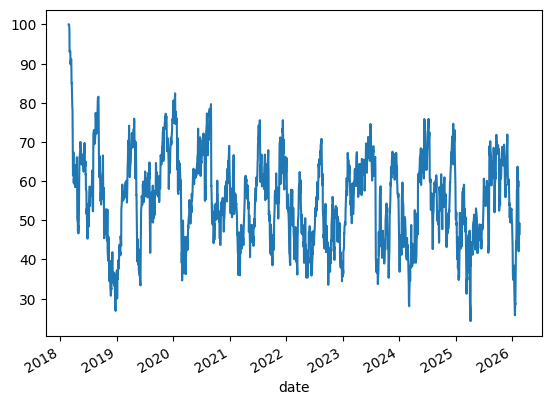

In [30]:
df.xs("AAPL", level=1)["rsi20"].plot()

In [31]:
pandas_ta.bbands(close=df.xs("AAPL", level=1)["close"], length=20)

,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0
date,,,,,
2018-02-22,NaN,NaN,NaN,NaN,NaN
2018-02-23,NaN,NaN,NaN,NaN,NaN
2018-02-26,NaN,NaN,NaN,NaN,NaN
2018-02-27,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2026-02-12,240.394322,262.200441,284.006559,16.633167,0.489213
2026-02-13,240.173792,262.091011,284.008230,16.724892,0.356026
2026-02-17,240.828812,262.520455,284.212098,16.525678,0.531338


In [34]:
df["bb_low"]=df.groupby(level=1)["close"].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df["bb_mid"]=df.groupby(level=1)["close"].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df["bb_high"]=df.groupby(level=1)["close"].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

In [35]:
df.head()

Price                  close       high        low       open       volume  \
date       ticker                                                            
2018-02-22 A       66.568550  67.585728  66.408441  67.548054    2403400.0   
           AAPL    40.524883  40.865526  40.339293  40.360435  123967600.0   
           ABBV    83.431778  84.971821  82.736280  84.148572    5185700.0   
           ABT     51.239719  51.595852  51.074680  51.430813    5539900.0   
           ACGL    27.874006  28.276554  27.579226  28.149766    1794000.0   

Price              garman_klass_vol  rsi20  bb_low  bb_mid  bb_high  
date       ticker                                                    
2018-02-22 A               0.000072    NaN     NaN     NaN      NaN  
           AAPL            0.000078    NaN     NaN     NaN      NaN  
           ABBV            0.000327    NaN     NaN     NaN      NaN  
           ABT             0.000046    NaN     NaN     NaN      NaN  
           ACGL            0.000274    NaN     NaN     NaN      NaN

In [36]:
def compute_atr(stock_data):
  atr=pandas_ta.atr(high=stock_data["high"],
                    low=stock_data["low"],
                    close=stock_data["close"],
                    length=14)
  return atr.sub(atr.mean()).div(atr.std())

In [37]:
df["atr"]=df.groupby(level=1, group_keys=False).apply(compute_atr)

In [38]:
df.head()

Price                  close       high        low       open       volume  \
date       ticker                                                            
2018-02-22 A       66.568550  67.585728  66.408441  67.548054    2403400.0   
           AAPL    40.524883  40.865526  40.339293  40.360435  123967600.0   
           ABBV    83.431778  84.971821  82.736280  84.148572    5185700.0   
           ABT     51.239719  51.595852  51.074680  51.430813    5539900.0   
           ACGL    27.874006  28.276554  27.579226  28.149766    1794000.0   

Price              garman_klass_vol  rsi20  bb_low  bb_mid  bb_high  atr  
date       ticker                                                         
2018-02-22 A               0.000072    NaN     NaN     NaN      NaN  NaN  
           AAPL            0.000078    NaN     NaN     NaN      NaN  NaN  
           ABBV            0.000327    NaN     NaN     NaN      NaN  NaN  
           ABT             0.000046    NaN     NaN     NaN      NaN  NaN  
           ACGL            0.000274    NaN     NaN     NaN      NaN  NaN

In [40]:
def compute_macd(close):
  macd=pandas_ta.macd(close=close, length=20).iloc[:, 0]
  return macd.sub(macd.mean()).div(macd.std())

df["macd"] = df.groupby(level=1, group_keys=False)["close"].apply(compute_macd)

In [41]:
df["dollar_volume"] = (df["close"]*df["volume"])/1e6